## Atliqo Bank Credit card project

### Business Analysis and launch of AB testing: Targeting Untapped Market

### Insights specific to customers with age group of 18 - 25
1. People with age group of 18 -25 accounts to ~25% of customer base in the data
2. Avg annual income of this age group is less than 50k
3. They don't have much credit history which is getting reflected in their credit score and max credit limit 
4. Usage of credit cards as payment type is relatively low compared to other groups
5. Avg transaction amount made with credit cards is also low compared to other groups
5. Top 3 most used shopping products categories  : Electronics, Fashion & Apparel, Beauty & Personal care

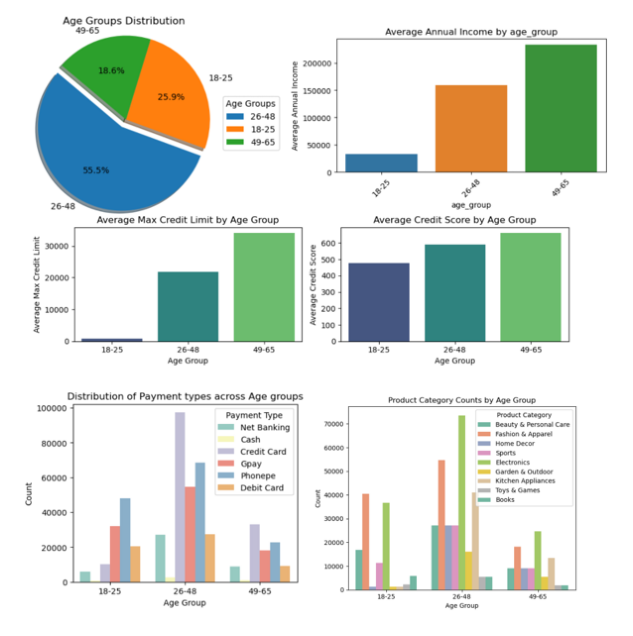

In [9]:
from PIL import Image
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
# Replace 'image.jpg' with the path to your image file
img = Image.open('analysis.png')
plt.imshow(img)
plt.axis('off')
plt.show()

## step-1 Pre-Campaign

We want to do a trial run for our new credit card. For this we need to figure out (1) How many customers do we need for our A/B testing. We will form a control and test group. For both of these groups we can figure out number of customers we need based on the statistical power and effect size that we agree upon after discussing with business. We will use 

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [28]:
import statsmodels.stats.api as sms
import statsmodels.api as sm
from scipy import stats as stats

In [30]:
alpha = 0.05
power = 0.8
effect_size=0.2

sms.tt_ind_solve_power(
    effect_size=0.2, 
    alpha=alpha, 
    power=power, 
    ratio=1, 
    alternative='two-sided'
)

393.4056989990348

For effect size 2 we need 393 customers. We have to keep in mind budgeting restrictions while running this campaign hence let us run this for different effect sizes and discuss with the business to find out which sample size would be optimal

In [46]:
#lets us find the optimal effect size

effect_sizes=[0.1,0.2,0.3,0.4,0.5,1]
new_dict={}
for i in effect_sizes:
    sample_sizes=sms.tt_ind_solve_power(effect_size=i, alpha=0.05, power=0.8, ratio=1, alternative='two-sided')
    new_dict[i]=round(sample_sizes)
print(new_dict)

{0.1: 1571, 0.2: 393, 0.3: 175, 0.4: 99, 0.5: 64, 1: 17}


In [ ]:
#Based on business requirements, the test should be capable of detecting a minimum 0.4 
#standard deviation difference between the control and test groups. For the effect size 0.4,
#we need 100 customers and when we discussed with the business, 100 customers is ok in terms of their budgeting constraints for this trail run.

Forming control and test groups

1.We have identified approximately 246 customers within the age group of 18 to 25. From this pool, we will select 100 customers for the initial campaign launch.

2.The campaign is launched for 100 customers, as determined by the effective size calculation and by considering budgeting costs, and will run campaign for a duration of 2 months

3.Got a conversion rate of ~40% ( implies 40 out of 100 customers in test group started using credit card)

4.To maintain a similar sample size, a control group consisting of 40 customers will be created. Importantly, this control group will be completely exclusive of initial 100 customers used as test group.

5.So now we have 40 customers in each of control and test groups

##### At the end of the 2-month campaign period (from 09-10-23 to 11-10-23), we obtained daily data showing the average transaction amounts made by the entire group of 40 customers in both the control and test groups using existing and newly launched credit cards respectively

##### The key performance indicator (KPI) for this AB test aims to enhance average transaction amounts facilitated by the new card

### step - 2 post campaign

In [52]:
# Loading campaign results data
df = pd.read_csv('data/avg_transactions_after_campaign.csv')
df.head(4)

,campaign_date,control_group_avg_tran,test_group_avg_tran
0,2023-09-10,259.83,277.32
1,2023-09-11,191.27,248.68
2,2023-09-12,212.41,286.61
3,2023-09-13,214.92,214.85


In [54]:
df.shape
#we have data for more than 2 months (approx-2months)

(62, 3)

In [56]:
sample_size=df.shape[0]
sample_size

62

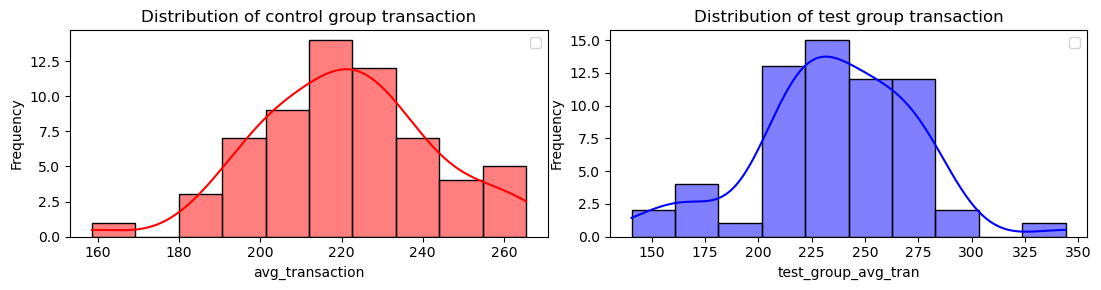

In [80]:
#lets us plot histgram


fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(11,3))

sns.histplot(df["control_group_avg_tran"],kde=True,bins=10,color="r",ax=ax1)
ax1.set_xlabel("avg_transaction")
ax1.set_ylabel("Frequency")
ax1.set_title("Distribution of control group transaction")
ax1.legend()

sns.histplot(df["test_group_avg_tran"],kde=True,bins=10,color="b",ax=ax2)
ax2.set_xlabel("test_group_avg_tran")
ax2.set_ylabel("Frequency")
ax2.set_title("Distribution of test group transaction")
ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:
#perform hypothesis testing

#ho :the avg of test group spending is less than or equal to avg of control group 
#h1: the avg of test group spending is more than avg of control group 

In [84]:
df.columns

Index(['campaign_date', 'control_group_avg_tran', 'test_group_avg_tran'], dtype='object')

In [88]:
#control group

control_mean = df["control_group_avg_tran"].mean().round(1)
control_std =round( df["control_group_avg_tran"].std(),1)

control_mean,control_std

(221.2, 21.4)

In [92]:
#test_group

test_mean = df["test_group_avg_tran"].mean().round(1)
test_std = round(df["test_group_avg_tran"].std(),1)

test_mean,test_std

(236.0, 36.7)

In [ ]:

# lets perform the z test for hypothesis testing as sample size is more than 30

# z= test_mean-control_mean/np.sqrt((test_std**2/sample_size)+(control_std**2/sample_size))

In [96]:
a= round(np.power(control_std,2)/sample_size,1)
b= round(np.power(test_std,2)/sample_size,1)

a,b

(7.4, 21.7)

In [102]:

#manual_function
z_value = (test_mean-control_mean)/np.sqrt((a+b))
z_value

2.7435647917122417

In [110]:
p_val=1-stats.norm.cdf(z_value)
p_val

0.0029952824622024865

In [ ]:
#inbuilt_funtion

In [106]:
z_value,p_value=sm.stats.ztest(df["test_group_avg_tran"],df["control_group_avg_tran"],alternative="larger")
z_value,p_value

(2.7482973745691135, 0.002995282462202502)

In [114]:
#lets calculate z_critical for 95 % of confidence level

z_critical=stats.norm.ppf(0.95)
z_critical

1.644853626951472

In [ ]:
# Since the Z score is higher than the critical Z value, we can reject the null hypothesis. also, p-value is less than significance level so we reject 
# null hypothesis based on the two tests(rejection region and p-value test)
# hence it is proved that the average of test group spending is more than that of the control group.

In [118]:
# aslo we worked on the confidence interval for the test group's average spending amount

test_group_ct=stats.norm.interval(0.95,loc=test_mean,scale=test_std/np.sqrt(sample_size))
test_group_ct
#mean amount customers are going to send

(226.86479472924742, 245.13520527075258)